In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import fio_parse
from pathlib2 import Path

In [3]:
input_dirs=list(Path('/alaska/bharat/beegfs-16-randwrite/').iterdir())
output_dir=Path('output/beegfs-16-randwrite')

In [4]:
clat_grid = fio_parse.ClatGrid(input_dirs, output_dir, 200, force=True, logscale=True, mode='write', skip_bs=[128, 256])

Deleting existing output data output/beegfs-16-randwrite/decorated-blog.png in output directory
Deleting existing output data output/beegfs-16-randwrite/write-bandwidth.dat in output directory
Deleting existing output data output/beegfs-16-randwrite/write-iops-latency.dat in output directory
Deleting existing output data output/beegfs-16-randwrite/write-clat.dat in output directory
Deleting existing output data output/beegfs-16-randwrite/blob.png in output directory
Scanning for fio data in /alaska/bharat/beegfs-16-randwrite/beegfs-write-mlr6v
I/O size      128, job write: 32 samples
I/O size      256, job write: 32 samples
I/O size      512, job write: 163477 samples
I/O size     1024, job write: 164215 samples
I/O size     2048, job write: 191299 samples
I/O size     4096, job write: 518605 samples
I/O size     8192, job write: 434164 samples
I/O size    16384, job write: 324130 samples
I/O size    32768, job write: 180098 samples
I/O size    65536, job write: 93970 samples
I/O size 

In [5]:
cldf = pandas.read_csv(output_dir/'write-clat.dat',header=None,index_col=0,names=['ns','freq'],delimiter='\t')
cldf.index.name = 'block size'
cldf.columns.name = 'bandwidth'

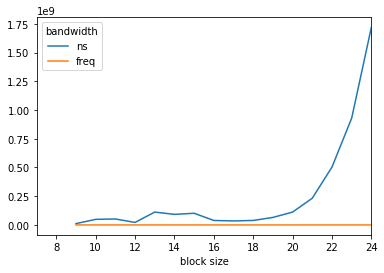

In [6]:
cldf.groupby(cldf.index).mean().plot(xlim=[7,24])

In [7]:
bwdf = pandas.read_csv(output_dir/'write-bandwidth.dat',header=None,index_col=0,names=['read','write'],delimiter='\t')
bwdf.index.name = 'block size'
bwdf.columns.name = 'bandwidth'

Text(0,0.5,'bandwidth')

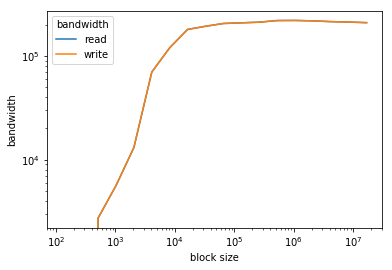

In [8]:
ax = bwdf.groupby(bwdf.index).mean().plot(loglog=True)
ax.set_ylabel('bandwidth')

In [9]:
cols=['iops','1%','5%','10%','20%','30%','40%','50%','60%','70%','80%','90%','95%','99%','99.5%','99.9%','99.95%','99.99%']
ildf=pandas.read_csv(output_dir/'write-iops-latency.dat',header=None,index_col=0,names=cols,delimiter='\t')
ildf.index.name = 'block size'
ildf.columns.name = 'percentiles'

In [10]:
mildf = ildf.groupby(ildf.index).mean()/clat_grid.divider
mildf.index = np.log2(mildf.index)

Plotting to output/beegfs-16-randwrite/blob.png


/opt/bharat/venv-openstack/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


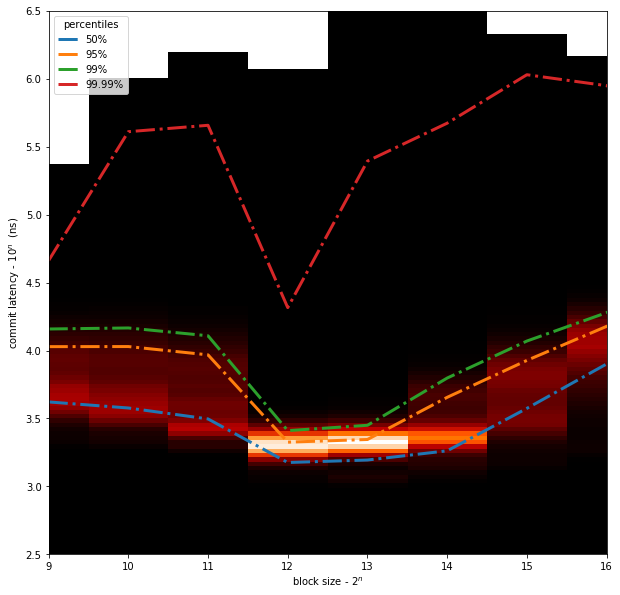

In [11]:
fig = clat_grid.plot_data(output_dir=output_dir,cmap='gist_heat')
# fig=df[[8,12,14,18]].plot(figsize=(10,10))
np.log10(mildf[['50%','95%','99%','99.99%']]).plot(figsize=(10,10),ax=fig.axes[0],xlim=[9,16],ylim=[2.5,6.5], linewidth=3,style='-.')
plt.xlabel('block size - $2^n$')
plt.ylabel('commit latency - $10^n$  (ns)')
plt.savefig('%s/%s'%(output_dir,'decorated-blog.png'))